<a href="https://colab.research.google.com/github/maxigaarp/Gestion-de-datos-2022/blob/main/Taller_2_Gesti%C3%B3n_de_datos_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo relacional**




Para esta parte del taller vamos a trabajar con la base de datos de la matricula de estudiantes de Educación superior del año 2020

Para ello, vamos a descargar la base de datos y, al mismo tiempo, vamos a descargar el esquema de registro de la tabla, que uno puede encontrar en los siguientes link

https://datosabiertos.mineduc.cl/matricula-en-educacion-superior/

https://datosabiertos.mineduc.cl/wp-content/uploads/2021/12/Matricula-Educacion-Superior-2020.rar

In [ ]:
install.packages("tictoc")
install.packages("data.table")
library("tictoc")
library(tidyverse)
library(data.table)
library(dplyr)

In [ ]:
system("gdown --id 1jDBPog5TrYaYgcnXTvyWecI90uccuWU2")

In [ ]:
unzip("/content/20200706_Matrcula_Ed_Superior_2020_PUBL_MRUN.zip")

In [ ]:
matricula <- fread("/content/20200706_Matrcula_Ed_Superior_2020_PUBL_MRUN.csv", "encoding" ="UTF-8")

Lo primero que haremos con este trabajo, será elaborar un modelo entidad-relación. Para ello, debemos investigar el esquema de registro y responder una serie de preguntas:



1.   ¿Qué entidades existen?
2.   ¿Cómo se relacionan estas entidades?
3.   ¿Cuáles son los atributos de cada entidad?
4.   ¿Cuál es la llave de cada entidad?



In [ ]:
str(matricula)

In [ ]:
#Escribir las bases de datos de acuerdo a nuestro modelo relacional
alumnos <- matricula[, c("MRUN", "GEN_ALU", "FEC_NAC_ALU")]
estudia_en <- matricula[,c("MRUN", "cod_inst", "cat_periodo", "rango_edad")] 
cursa <- matricula[,c("MRUN","codigo_unico", "cat_periodo", "rango_edad", "anio_ing_carr_ori", "sem_ing_carr_ori", "anio_ing_carr_act", "sem_ing_carr_act", "forma_ingreso")] 
carrera <- matricula[, c("codigo_unico", "cod_sede", "nomb_sede", "cod_carrera", "nomb_carrera", "modalidad", "jornada", "version", "tipo_plan_carr", "dur_estudio_carr", "dur_proceso_tit", "dur_total_carr", "region_sede", "provincia_sede", "comuna_sede", "nivel_global", "nivel_carrera_1", "nivel_carrera_2", "requisito_ingreso",  "vigencia_carrera", "valor_matricula", "valor_arancel", "codigo_demre", "area_conocimiento", "oecd_area",  "oecd_subarea", "area_carrera_generica", "acreditada_carr", "costo_proceso_titulacion",  "costo_obtencion_titulo_diploma" )]
IES <- matricula[, c("cod_inst","tipo_inst_1", "tipo_inst_2", "tipo_inst_3", "nomb_inst", "acreditada_inst", "acre_inst_desde_hasta", "acre_inst_anio")]
pertenece_a <- matricula[,c( "codigo_unico","cod_inst")]


In [ ]:
alumnos <- unique(alumnos)
estudia_en <- unique(estudia_en)
cursa <- unique(cursa)
carrera <- unique(carrera)
IES <- unique(IES)
pertenece_a <- unique(pertenece_a)

In [ ]:
alumnos

## Unir dos bases de datos

In [ ]:
tic()
alumno_universidad <- inner_join(alumnos, estudia_en, by = "MRUN", suffix = c(".a", ".b"))

toc()

In [ ]:
str(alumno_universidad)

La unión que hemos realizado hasta aquí es una unión del tipo inner join o intersección. Este tipo de unión entrega todos los valores que se encuentren en ambas bases de datos.

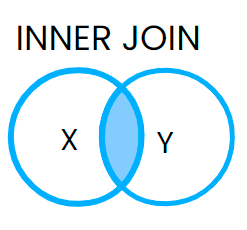

La librería dplyr nos permite una gran variedad de uniones, mediante comandos esencialmente iguales: **inner_join()**, **full_join()**, **left_join()**, **right_join()** 


El comando debe ser utilizado de la siguiente forma:

inner_join(x, y, by = NULL, copy = FALSE, suffix = c(".x", ".y"))

con $x, y$ las bases de datos.

$by$ es la(s) llave(s) con las que uno une ambas bases de datos. En caso de que las llaves se llamen diferente en cada base de datos, se utiliza un vector $by = c($"llave x" $=$ "llave y"$)$

$suffix$ uno determina el sufijo que deban llevar las columnas repetidas, en caso de que las haya.

Los outer join, que en la librería se obtienen con el comando full_join(), nos entregan todos los elementos de ambas bases de datos, uniendo aquellos en que se intersecten

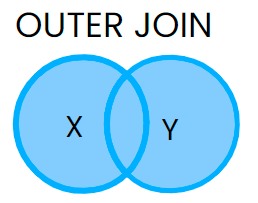

In [ ]:
tic()
alumno_universidad <- full_join(alumnos, estudia_en, by = "MRUN")
toc()

In [ ]:
str(alumno_universidad)

Por su parte, left_join() nos retorna la intersección de las bases, y todas las filas de la base x que no tienen fila correspondiente en la base y, como vemos en la imagen.

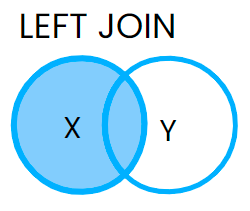




In [ ]:
tic()
alumno_universidad <- left_join(alumnos, estudia_en, by = "MRUN")
toc()

In [ ]:
str(alumno_universidad)

Finalmente, right_join() nos entrega la intersección de las bases, y todas las filas de la base y que no tienen fila correspondiente en la base x.

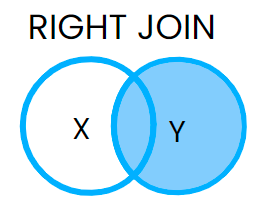

In [ ]:
tic()
alumno_universidad <- right_join(alumnos, estudia_en, by = "MRUN")
toc()

In [ ]:
str(alumno_universidad)

## **Operadores**

Aquí repasaremos algunos de los operadores básicos vistos en clases y su uso en R, siguiendo la estructura del álgebra relacional gracias a la librería tidyverse

Proyección

La proyección, tal como vimos en clases, toma solamente los atributos que uno quiere de nuestra relación.

Para hacer esto en R utilizamos el comando select(), de la siguiente forma:

df %>% select(a1,a2,...,an)

Por ejemplo: Liste todas las instituciones de educación superior

In [ ]:
IES %>% select("nomb_inst")

Renombrar

Con esta operación uno cambia el nombre de nuestros atributos, en R se utiliza el comando rename(), de la misma forma que select():

df %>% rename(a1=nuevo_a1)

In [ ]:
carrera %>% rename("sede"= "nomb_sede")

Selección

Deja todas las tuplas que cumplan una condición, para ello utilizamos el comando filter()

df %>% filter( x<=y )

In [ ]:
estudia_en %>% filter(cod_inst == 86)

In [ ]:
IES %>% filter(acre_inst_anio >= 5) %>% select("nomb_inst")


In [ ]:
Acreditadas <-IES %>% filter(acre_inst_anio >= 5) %>% select("nomb_inst")

In [ ]:
Universidades <-IES %>% filter(tipo_inst_1 == "Universidades") %>% select("nomb_inst")

Unión

Con este operador obtenemos las tuplas que cumplan una condición de dos relaciones diferentes, para ello usamos el comando union o en este caso tambien full_join():

df %>% full_join(df2,by= atributo)

In [ ]:
Acreditadas %>% full_join(Universidades, by ="nomb_inst")

Intersección

Con este operador obtenemos las tuplas que pertenecen a ambas relaciones, podemos usar el comando semi_join()

df %>% semi_join(df2,by= atributo)

In [ ]:
Acreditadas %>% semi_join(Universidades, by ="nomb_inst")

Diferencia

Tal como se vio en clases, se obtienen las tuplas que pertenecen a una relación, pero no a otra. Para ello usaremos el comando anti_join()

df %>% anti_join(df2,by= atributo)

In [ ]:
Acreditadas %>% anti_join(Universidades, by ="nomb_inst")

Agregación

Además de las consultas básicas, es muy utilizada la agregación o agrupación de tuplas que compartan un factor común. Esta agregación debe utilizarse en conjunto con operaciones aritmeticas, como la cuenta, el promedio, la suma, entre otras.

El comando en R para realizar este trabajo es groupby


In [ ]:
IES %>% group_by(tipo_inst_1) %>% summarize(acreditacion_promedio = mean(acre_inst_anio, na.rm=TRUE)) 

## Actividad

Realice las siguientes consultas a sus bases de datos:



1.   Entregue el MRUN de todos los alumnos menores a 30 años
2.   Liste cuantas carreras existen para cada sub área OCDE
3.   Entregue la acreditación promedio para cada tipo de universidad (Privada, Estatal y Tradicional)
4.   Enumere la cantidad de alumnos que estudian en cada institución, agrupados por año de acreditación



# **Graficando en R**

La librería más utilizada para graficar en R es ggplot, que entrega una gran cantidad de funcionalidades. Al igual que las otras librerías, hay que llamarla.

In [ ]:
library(ggplot2)

In [ ]:
system("gdown https://drive.google.com/uc?id=1q089qSqKr7Ak29lUkzKSWjm2pcb_jzX0")

In [ ]:
unzip("/content/matriculas_y_notas_anual.zip")

In [ ]:
rendim2020 <- fread("/content/content/Datos/20210223_Rendimiento_2020.csv")

Para utilizar la librería, se sigue la siguiente sintaxis



```
# ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>, <STATS>),
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

Siguiendo paso a paso, observemos que en primer lugar uno debe cargar los datos en el gráfico, con lo que se genera un cuadro en blanco que va a ser la base con la que vamos a trabajar.



In [ ]:
ggplot(data = rendim2020)

Para obtener información, uno debe decidir que tipo de gráfico quiere hacer, usualmente asociado al tipo de dato con el que quiere trabajar. Esos son los geomas y los más importantes son los siguientes:

*   **geom_bar()**, nos entrega un gráfico de barras.
*   **geom_point()**, observamos un gráfico de puntos.
*   **geom_line()**, nos entrega un gráfico de lineas.
*   **geom_boxplot()**, un gráfico de cajas.
*   Entre otros.

Una vez seleccionado el  tipo de gráfico que queremos ver, mapeamos la variable que nos interesa.



In [ ]:
ggplot(data = rendim) + geom_bar( mapping = aes(x = GEN_ALU))

Como vemos, al seleccionar un gráfico de barras automaticamente obtengo la cantidad de alumnos que tiene cada variable. Pero, ¿Es necesariamente esta la forma en que queremos presentar esta variable?

Ante la necesidad de decir más cosas con los gráficos, aparecen los estadísticos (stats). La modificación de estos, y su combinación con geomas, amplian nuestras opciones para graficar y visualizar la información de nuestra base de datos. Por ejemplo, podemos ver la proporción de cada sexo.

In [ ]:
ggplot(data = rendim) + geom_bar( mapping = aes(x = GEN_ALU, y = after_stat(prop)))

Parte importante del trabajo de gráficos, es que el sistema de coordenadas sea el correcto para poder hacer un análisis o presentar la información. para lograrlo, en ggplot agregamos la capa de funciones de coordenadas.

Dentro de las opciones que tienen estas funciones está el elegir los límites de los ejes, invertir el eje x y el eje y, seleccionar coordenadas polares o hasta trabajar con mapas de acuerdo a latitud y longitud.




In [ ]:
ggplot(data = rendim2020) + geom_bar( mapping = aes(x = GEN_ALU, y = after_stat(prop), ))+
  coord_cartesian(xlim = c(0.5, 2.5))  

Una vez obtenido el gráfico, podemos buscar tener más información. Por ejemplo, ¿Cómo sería la distribución de genero por tipo de establecimiento?

Ante la necesidad de agregar una nueva variable, tenemos tres alternativas para lograr mejores visualizaciones, los comandos de posición, las estéticas (aes) y las facetas.

Los comandos de posición y las estéticas son formas de incluir más información dentro del mismo gráfico, cambiando los tamaños, colores y formas de los geomas. Por ejemplo, podemos ver la proporción de hombres y mujeres de acuerdo al tipo de establecimiento.

In [ ]:
rendim2020$COD_DEPE2 <- as.character(rendim2020$COD_DEPE2)

In [ ]:
ggplot(data = rendim2020) + geom_bar( mapping = aes(x = GEN_ALU, fill = COD_DEPE2))+
  coord_cartesian(xlim = c(0.5, 2.5)) 

In [ ]:
ggplot(data = rendim2020) + geom_bar( mapping = aes(x = GEN_ALU, y = after_stat(prop), fill = COD_DEPE2))+
  coord_cartesian(xlim = c(0.5, 2.5))  

In [ ]:
ggplot(data = rendim2020) + geom_bar( mapping = aes(x = GEN_ALU, y = after_stat(prop), fill = COD_DEPE2), position = "dodge")+
  coord_cartesian(xlim = c(0.5, 2.5))  

Ahora, las facetas implican generar subgráficos que entregan la información fijada respecto a un valor Con ello, podemos comparar valores de acuerdo a una variable de control.

In [ ]:
ggplot(data = rendim2020) + geom_bar( mapping = aes(x = GEN_ALU, y = after_stat(prop), ))+
  coord_cartesian(xlim = c(0.5, 2.5))  + facet_wrap(~ COD_DEPE2, nrow = 2)

## **Actividad grafica**

Utilizando la base de datos unida en la actividad anterior, y realice 2 gráficos distintos que le permitan conocer de mejor forma la data con la que cuenta. El tema es libre, pero debe generar información que no pueda conseguir con solo una de las dos bases de datos.